In [1]:
%load_ext autoreload
%autoreload 2

import sys
from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt

LOG.propagate = False

In [2]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2024-03-13 14:50:20,596 | INFO     |: info
2024-03-13 14:50:20,600 | WARNING  |: warning
2024-03-13 14:50:20,600 | ERROR    |: error
2024-03-13 14:50:20,600 | CRITICAL |: critical


In [3]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2024-03-13 14:50:21,624 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:89:c1:6d:24:4b
2024-03-13 14:50:29,114 | INFO     |: Connected to c0:89:c1:6d:24:4b


C:\Users\xyx07\Fast_Robot\Webpage\FR-2024\code\Lab3\ToF2\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [4]:
ble.send_command(CMD.ECHO, "HiHello")
output1 = ble.receive_string(ble.uuid['RX_STRING'])
print(output1)

Robot says: HiHello :)


In [5]:
raw_message=[]
#add more arrays if needed
num = []
timeToF = [] #in seconds
distanceF = [] 
distanceS = [] 
timeIMU = []
xAcc = [] 
yAcc = []
zAcc = []
xGyr = [] 
yGyr = []
zGyr = []
def clear_data():
    # Clear all the sensor data arrays
    timeIMU.clear()
    distanceF.clear()
    distanceS.clear()
    timeToF.clear()
    xAcc.clear()
    yAcc.clear()
    zAcc.clear()
    xGyr.clear()
    yGyr.clear()
    zGyr.clear()
    
def notification_handler(uuid, byte_array):
    global timeIMU,distanceF,distanceS,timeToF,xAcc,yAcc,zAcc,xGyr,yGyr,zGyr
    raw_message.append(byte_array)
    message = ble.bytearray_to_string(byte_array)
    if message=='ToF data received.':
        print("ToF data received.")
    elif message=='IMU data received.':
        print("IMU data received.")
    else:
        readings = message.split('|')
        num.clear()
        for reading in readings:
            label, value = reading.split(':')
            num.append(float(value))
        if len(num)==3:
            timeToF.append(num[0]/1000)
            distanceF.append(num[1])
            distanceS.append(num[2])
        elif len(num)==7:
            timeIMU.append(num[0]/1000)
            xAcc.append(num[1])
            yAcc.append(num[2])
            zAcc.append(num[3])
            xGyr.append(num[4])
            yGyr.append(num[5])
            zGyr.append(num[6])

In [6]:
ble.start_notify(ble.uuid['RX_STRING'], notification_handler)

In [7]:
clear_data()
ble.send_command(CMD.GET_DISTANCE, "")

ToF data received.


In [8]:

ble.send_command(CMD.GET_IMU_DATA, "")

IMU data received.


In [15]:
clear_data()
ble.send_command(CMD.GET_DISTANCE, "")
ble.send_command(CMD.GET_IMU_DATA, "")

IMU data received.
ToF data received.


In [9]:
print(f"It takes: {round(timeToF[-1]-timeToF[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeToF)/(timeToF[-1]-timeToF[0]))} samples/s.")
print(f"It takes: {round(timeIMU[-1]-timeIMU[0],3)}s to collect data.")
print(f"Sample rate is about {round(len(timeIMU)/(timeIMU[-1]-timeIMU[0]))} samples/s.")

It takes: 4.965s to collect data.
Sample rate is about 17 samples/s.
It takes: 0.998s to collect data.
Sample rate is about 286 samples/s.


In [10]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [11]:
# Disconnect
ble.disconnect()

2024-03-13 14:52:20,047 | INFO     |: Disconnected from C0:89:C1:6D:24:4B


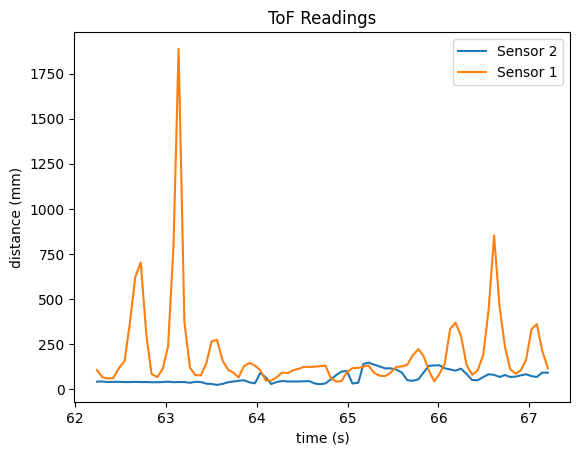

In [13]:
plt.plot(timeToF, distanceS, label = 'Sensor 2')
plt.plot(timeToF, distanceF, label = 'Sensor 1')
plt.xlabel('time (s)')
plt.ylabel('distance (mm)')
plt.title('ToF Readings')
plt.legend();

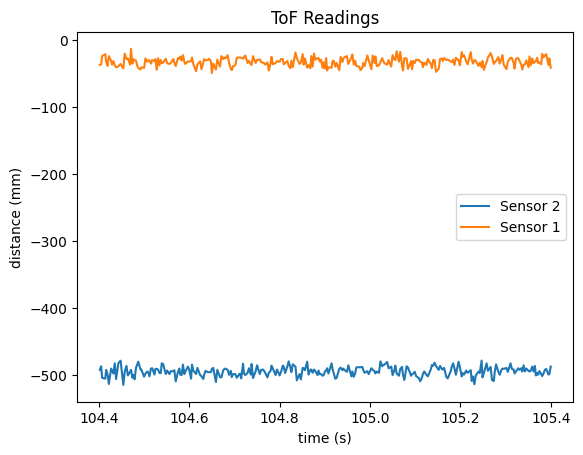

In [14]:
plt.plot(timeIMU, xAcc, label = 'Sensor 2')
plt.plot(timeIMU, yAcc, label = 'Sensor 1')
plt.xlabel('time (s)')
plt.ylabel('distance (mm)')
plt.title('ToF Readings')
plt.legend();

In [23]:
for i in range(len(time)):
    print(f"Time: {time[i]}s; Front Distance(mm): {distanceF[i]}; Front Distance(mm): {distanceS[i]}")

[bytearray(b'Time:81879.0|Front Distance:127|Side Distance:428'),
 bytearray(b'Time:82122.0|Front Distance:127|Side Distance:426'),
 bytearray(b'Time:82170.0|Front Distance:125|Side Distance:429'),
 bytearray(b'Time:82277.0|Front Distance:128|Side Distance:426'),
 bytearray(b'Time:82333.0|Front Distance:125|Side Distance:427'),
 bytearray(b'Time:82387.0|Front Distance:128|Side Distance:428'),
 bytearray(b'Time:82446.0|Front Distance:128|Side Distance:428'),
 bytearray(b'Time:82491.0|Front Distance:125|Side Distance:425'),
 bytearray(b'Time:82550.0|Front Distance:127|Side Distance:426'),
 bytearray(b'Time:82899.0|Front Distance:128|Side Distance:427'),
 bytearray(b'Time:82955.0|Front Distance:125|Side Distance:427'),
 bytearray(b'Time:83010.0|Front Distance:129|Side Distance:428'),
 bytearray(b'Time:83068.0|Front Distance:132|Side Distance:428'),
 bytearray(b'Time:83260.0|Front Distance:127|Side Distance:429'),
 bytearray(b'Time:83366.0|Front Distance:130|Side Distance:430'),
 bytearray

In [59]:
actualDis

array([ 10,  20,  30,  40,  50,  60,  80, 100, 120, 130, 140, 150])

In [44]:
stdDis 

array([  1.49921936,   0.96451073,   1.01086707,   0.90667544,
         0.72705985,   1.24684826,   1.52331857,   8.14859397,
         4.14236758,   7.91250278,  21.18561741, 310.78458332])

In [55]:
np.around(stdDis,2)

array([  1.5 ,   0.96,   1.01,   0.91,   0.73,   1.25,   1.52,   8.15,
         4.14,   7.91,  21.19, 310.78])